# Yash Ingle


## Data Science and Business Analytics Internship
### GRIP, The Sparks Foundation

### Task #5 : Exploratory Data Analysis : Sports (Indian Premier League)
 

# 1. Importing the libraries and csv Data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matchs =  matches.drop(axis='1',columns='umpire3')

In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
season_data = matches[['id','season','winner']]
season_data.head(5)

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant
2,3,2017,Kolkata Knight Riders
3,4,2017,Kings XI Punjab
4,5,2017,Royal Challengers Bangalore


In [6]:
data = deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')
data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [7]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [8]:
wins_each_season = matches.groupby("season")["winner"]
wins_each_season.value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

# 2. Number of matches played in each season

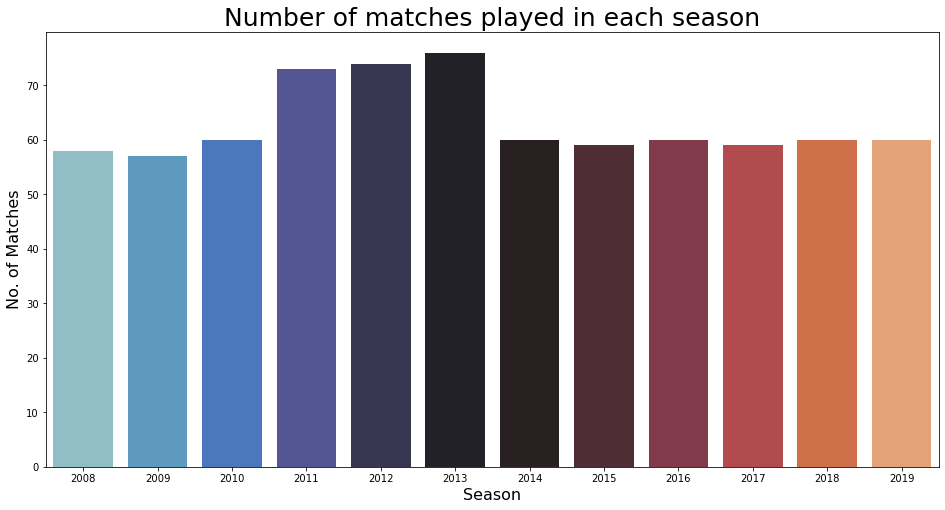

In [9]:
plt.figure(figsize=(16,8))
sns.countplot('season',data=season_data,palette='icefire')
plt.title("Number of matches played in each season",fontsize=25)
plt.xlabel("Season",fontsize=16)
plt.ylabel("No. of Matches",fontsize=16)
plt.show()

# 3. Number of matches won by the team

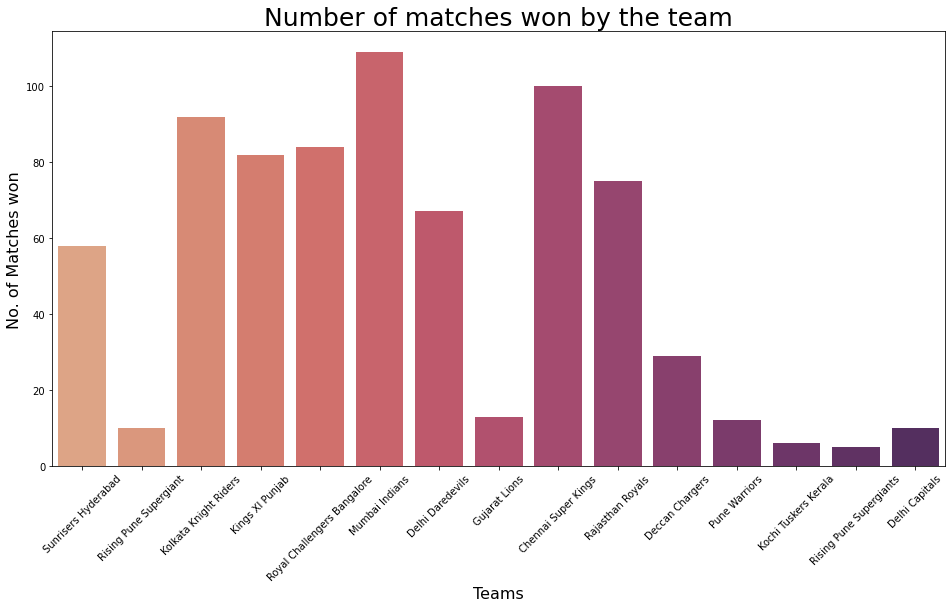

In [10]:
plt.figure(figsize=(16,8))
sns.countplot('winner',data=season_data,palette='flare')
plt.title("Number of matches won by the team",fontsize=25)
plt.xlabel("Teams",fontsize=16)
plt.ylabel("No. of Matches won",fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [11]:
matches['win_by']=np.where(matches['win_by_wickets']>0,'Bowl First','Bat First')

# 4. Win Type Analysis

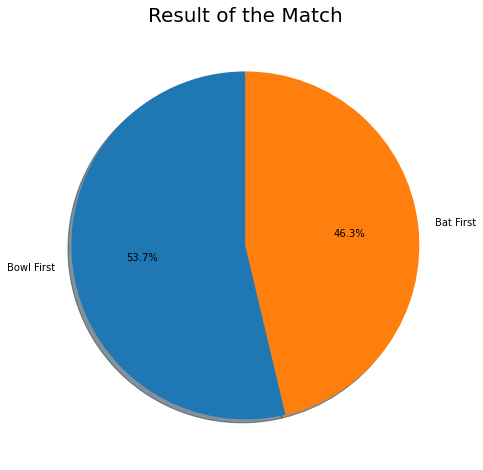

In [12]:
wins = matches['win_by'].value_counts()
lb = np.array(wins.index)
plt.figure(figsize=(12,8))
plt.pie(wins,shadow=True,startangle=90,labels=lb,autopct='%1.1f%%')
plt.title("Result of the Match",fontsize=20)
plt.show()

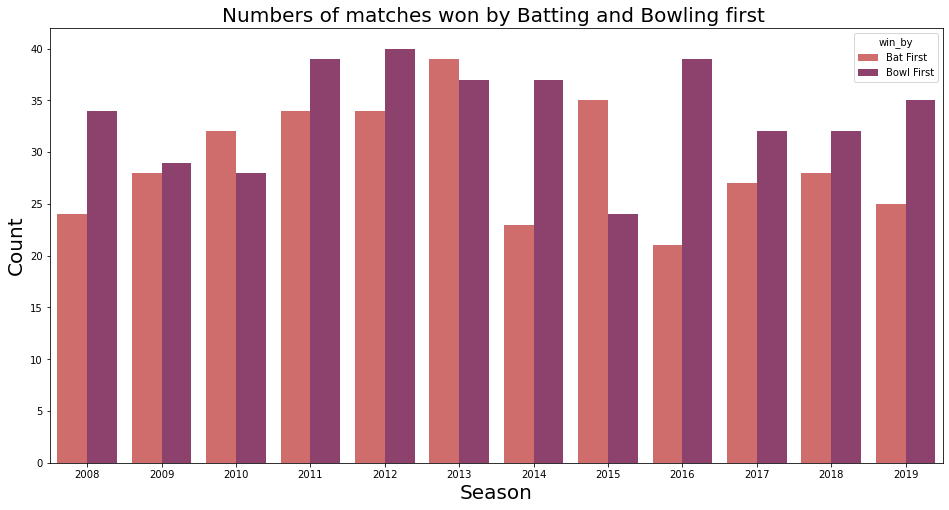

In [13]:
plt.figure(figsize = (16,8))
sns.countplot(data=matches,x='season',hue='win_by',palette='flare')
plt.title("Numbers of matches won by Batting and Bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

# 5. Toss Decisions Analysis

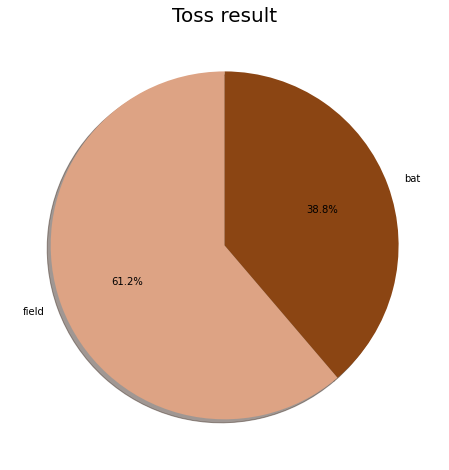

In [14]:
toss=matches['toss_decision'].value_counts()
labels=np.array(toss.index)
plt.figure(figsize = (12,8))
plt.pie(toss, labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,colors=['#dda384','#8b4513'])
plt.title('Toss result',fontsize=20)
plt.show()

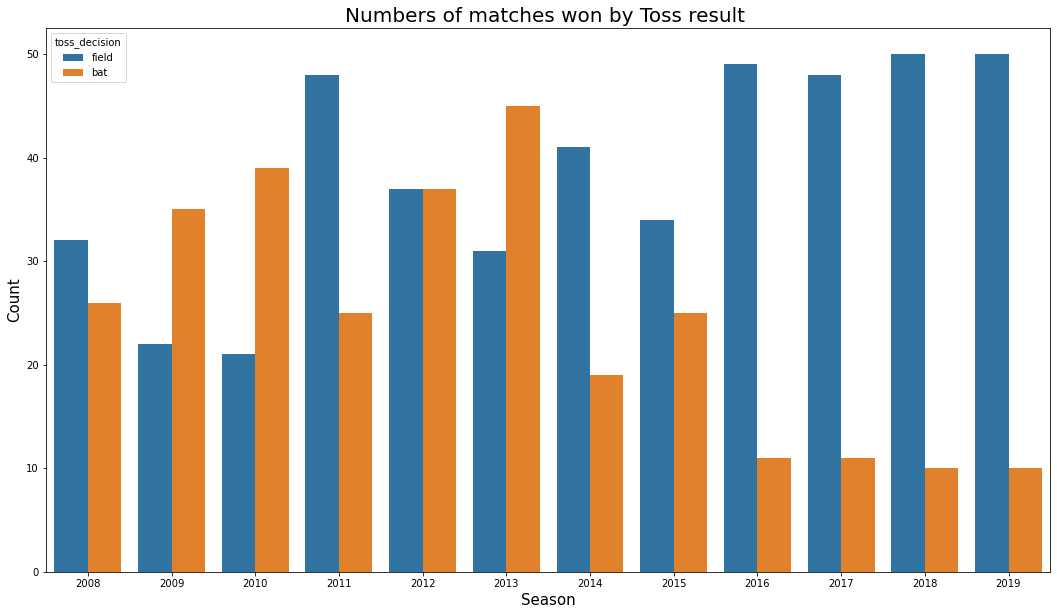

In [15]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=matches,palette='tab10')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

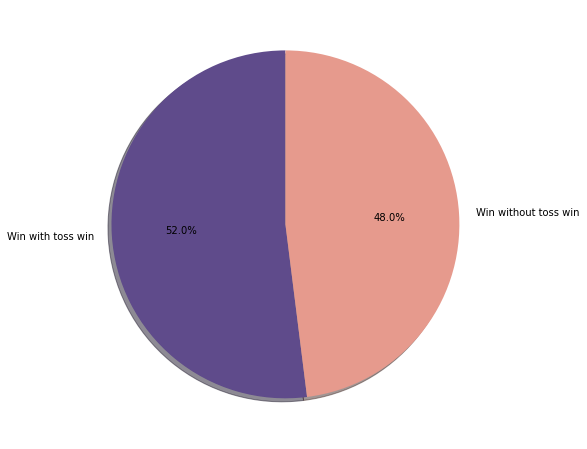

In [16]:
toss_win=matches[['toss_winner','toss_decision','winner']]
Toss_Win=toss_win['toss_winner']==toss_win['winner']
TW = Toss_Win.value_counts()
plt.figure(figsize = (12,8))
plt.pie(TW, labels=['Win with toss win','Win without toss win'],autopct='%1.1f%%',
        shadow=True,startangle=90,colors=['#5F4B8BFF','#E69A8DFF'])
plt.show()

# 6. Seasonal Winners

In [17]:
sea_win = matches[['season','winner']]
Sea_Win = sea_win.drop_duplicates(subset=['season'],keep='last')
Sea_Win.reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [18]:
Sea_Win['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

# 7. Top players by Player of the Match awards

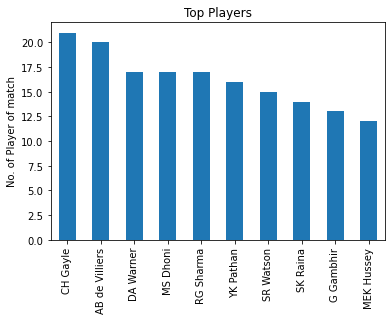

In [19]:
top = matches[['player_of_match']]
Top = top.player_of_match.value_counts()[:10]
Top.plot.bar()
plt.ylabel('No. of Player of match')
plt.title("Top Players")
plt.show()

# 8. Boundaries Analysis

In [20]:
data=deliveries.merge(matches[['id','season','winner']],how='inner',left_on='match_id',right_on='id')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [21]:
bound = data[['batting_team','batsman_runs']]
bound4 = bound[bound['batsman_runs']==4]
Bound4 = bound4.groupby('batting_team')['batsman_runs'].agg([('Fours','count')])
bound6 = bound[bound['batsman_runs']==6]
Bound6 = bound6.groupby('batting_team')['batsman_runs'].agg([('Sixes','count')]) 
B_Bound = Bound4.merge(Bound6,how='inner',left_on='batting_team',right_on='batting_team')
B_Bound

,Fours,Sixes
batting_team,,
Chennai Super Kings,2193,973
Deccan Chargers,957,400
Delhi Capitals,242,87
Delhi Daredevils,2158,801
Gujarat Lions,460,155
Kings XI Punjab,2458,976
Kochi Tuskers Kerala,170,53
Kolkata Knight Riders,2434,930
Mumbai Indians,2588,1096


In [22]:
B_tot = B_Bound['Fours']+B_Bound['Sixes']
B_tot

batting_team
Chennai Super Kings            3166
Deccan Chargers                1357
Delhi Capitals                  329
Delhi Daredevils               2959
Gujarat Lions                   615
Kings XI Punjab                3434
Kochi Tuskers Kerala            223
Kolkata Knight Riders          3364
Mumbai Indians                 3684
Pune Warriors                   721
Rajasthan Royals               2716
Rising Pune Supergiant          286
Rising Pune Supergiants         239
Royal Challengers Bangalore    3492
Sunrisers Hyderabad            1977
dtype: int64

In [23]:
b = data[['season','batsman_runs']]
b4 = b[b['batsman_runs']==4]
B4 = b4.groupby('season')['batsman_runs'].agg([('Fours','count')])
b6 = b[b['batsman_runs']==6]
B6 = b6.groupby('season')['batsman_runs'].agg([('Sixes','count')])
B_B = B4.merge(B6,how='inner',left_on='season',right_on='season')
B_B

,Fours,Sixes
season,,
2008,1703,623
2009,1321,508
2010,1709,587
2011,1916,639
2012,1911,733
2013,2054,681
2014,1563,715
2015,1611,692
2016,1633,639


In [24]:
B_Tot = B_B['Fours']+B_B['Sixes']
B_Tot

season
2008    2326
2009    1829
2010    2296
2011    2555
2012    2644
2013    2735
2014    2278
2015    2303
2016    2272
2017    2318
2018    2543
2019    2463
dtype: int64

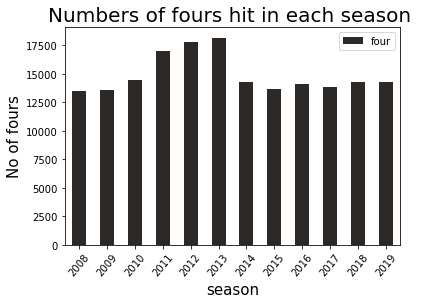

In [25]:
ax=b.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = '#2D2926FF')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

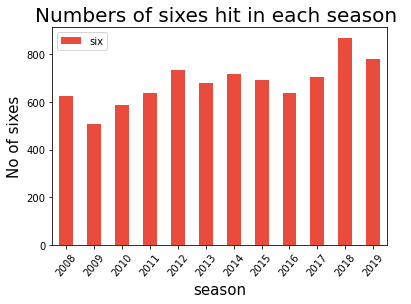

In [26]:
a=data[data['batsman_runs']==6]
bx=a.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = '#E94B3CFF')
plt.title("Numbers of sixes hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of sixes",fontsize=15)
plt.show()

# 9. Top Batsman

In [27]:
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:10]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# 10. Batsman Dismissal Type

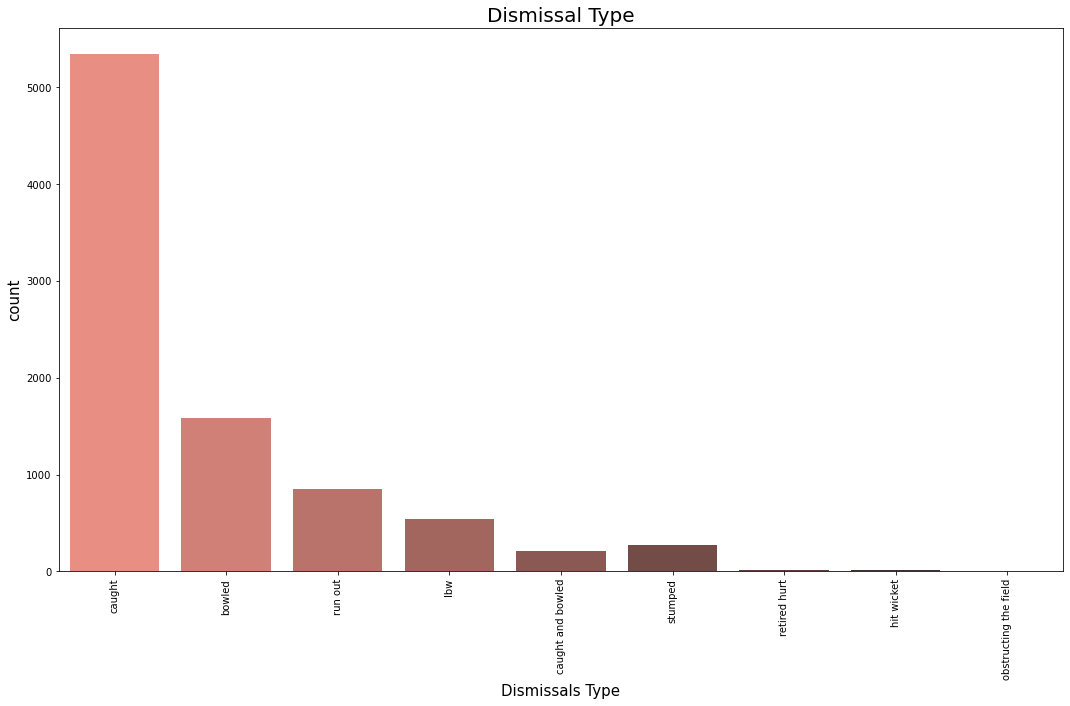

In [28]:
plt.figure(figsize=(18,10))
ax=sns.countplot(deliveries.dismissal_kind,palette='dark:salmon_r')
plt.title("Dismissal Type",fontsize=20)
plt.xlabel("Dismissals Type",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# 11. Top Bowler

In [29]:
w = deliveries.dropna(subset=['dismissal_kind'])
w = w[~w['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
w.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusion:
#### 1. Maximum number of matches were played in the season 2019 followed by 2012 and 2011.
#### 2. Most of the matches are won by Mumbai Indians followed by Chennai Super Kings and Kolkata Knight Riders.
#### 3. It has been seen that most of the matches are won by the teams which bowls first.
#### 4. On winning the toss, most of the teams choose to field first.
#### 5. Most of the matches are won by the teams winning the toss.
#### 6. Maximum number of seasons are won by Mumbai Indians followed by Chennai Super Kings and Kolkata Knight Riders.
#### 7. CH Gayle has won maximum player of the match awards followed by AB de Villiers and MS Dhoni.
#### 8. Maximum boundaries are hit by Mumbai Indians followed by Kings XI Punjab and Kolkata Knight Riders.
#### 9. Maximum boundaries were hit in the 2013 season of IPL.
#### 10. Top leading run scorers in IPL are Virat Kohli, SK Raina and RG Sharma.
#### 11. Most of the batsmen are dismissed by getting Caught.
#### 12. Top leading wicket takers in IPL are SL Malinga, A Mishra and Harbhajan Singh.

### It is suggested for the companies to involve Mumbai Indians, Kolkata Knight Riders or Chennai Super Kings for their products endorsements.
### Among the players, CH Gayle, Virat Kohli and SL Malinga are suggested to the companies for their product endorsements.




# Thank You !!